Bootstrap (100 draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


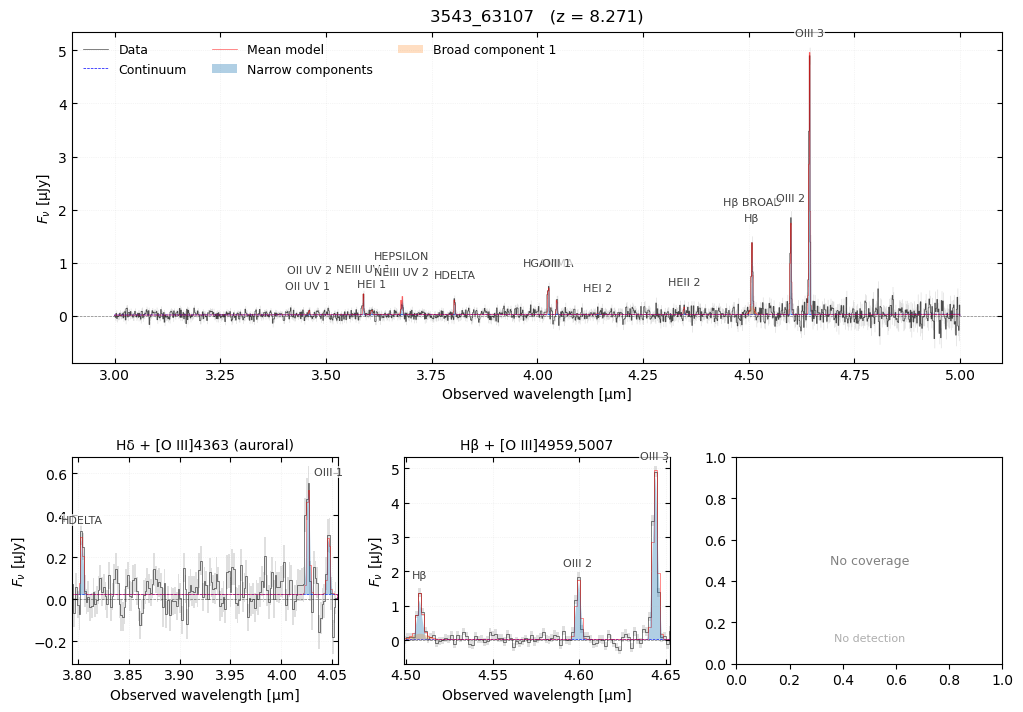


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow-only : BIC = 386.68
  + 1 Broad   : BIC = 275.82
  + 2 Broad   : BIC = 291.46
  + Broad2    : BIC = 276.34
  → Selected: Hβ narrow + BROAD

H-delta:
  Narrow-only : BIC = 391.66
  + 1 Broad   : BIC = nan
  + 2 Broad   : BIC = nan
  + Broad2    : BIC = nan
  → Selected: Hδ narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_UV_1        3.031e-20 ± 1.854e-20      2.22 ± 7.90    9.94 ± 3.10   34544.1 ± 24.7 0.51 ± 0.30      0.78 ± 0.52        0.23 ± 0.69
OII_UV_2        7.189e-20 ± 3.545e-20     15.84 ± 9.68    9.12 ± 2.28   34601.9 ± 20.7 1.40 ± 0.59      1.25 ± 0.53        1.42 ± 0.83
NEIII_UV_1      2.665e-19 ± 4.214e-20    59.81 ± 15.32   10.12 ± 1.20    35885.1 ± 1.

In [1]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


[skip] NEIII_UV_1: no usable pixels within ±0.00467 µm
Fit with lines=['NII_2', 'H⍺', 'NII_3']: χ²=510.91, k=9, BIC=555.38
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD']: χ²=153.99, k=12, BIC=213.29
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=164.82, k=15, BIC=238.94
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD2']: χ²=246.49, k=12, BIC=305.79
Local Hα+[N II] BIC (Hα window only):
  narrow-only      : BIC = 555.38
  +BROAD only      : BIC = 213.29
  +BROAD2 only     : BIC = 305.79
  +both BROAD      : BIC = 238.94
  → Selected model: narrow + BROAD
Fit with lines=['HBETA', 'OIII_2', 'OIII_3']: χ²=482.38, k=9, BIC=529.36
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD']: χ²=3427.51, k=12, BIC=3490.16
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD', 'HBETA_BROAD2']: χ²=943.92, k=15, BIC=1022.22
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD2']: χ²=3499.81, k=12, BIC=3562.45
Local Hβ+[O III] BIC (Hβ window only):
  narrow-o

Bootstrap (200 draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5472 - 4.7855 µm):
  NII_2          : 1.012e-18 erg/s/cm²
  H⍺             : 3.000e-17 erg/s/cm²
  NII_3          : 7.975e-19 erg/s/cm²
  H⍺_BROAD       : 1.660e-17 erg/s/cm²

Total (sum of components)     : 4.841e-17 erg/s/cm²
Total (integrated model)      : 4.965e-17 erg/s/cm²
Ratio (components/model)      : 0.9750
Discrepancy                   : -2.50%



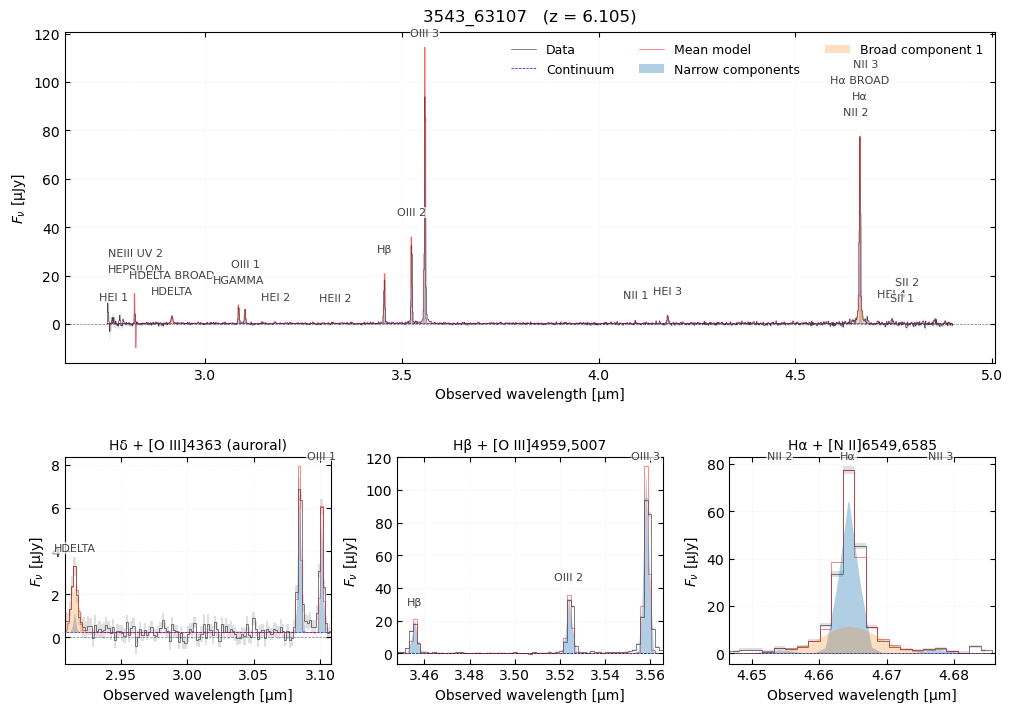


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 555.38
  Narrow + medium broad            : BIC = 213.29
  Narrow + medium + very broad     : BIC = 238.94
  Narrow + very broad only         : BIC = 305.79
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 529.36
  Narrow + medium broad            : BIC = 3490.16
  Narrow + medium + very broad     : BIC = 1022.22
  Narrow + very broad only         : BIC = 3562.45
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 679.95
  Narrow + medium broad            : BIC = 639.93
  Narrow + medium + very broad     : BIC = 684.52
  Narrow + very broad only         : BIC = 671.61
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
------------------------------------------

In [3]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)